# MWE: Synchrosqueezing + Ridge Detection
*Note: This method is implemented in Matlab. You must have a functioning matlab installation in order to use this approach.
Matlab is called from using a Python-Matlab interface based on Matlab's Python engine.
See instructions [here](https://github.com/jmiramont/benchmark-test/tree/main?tab=readme-ov-file#matlab-based-method) in order to run Matlab-based approaches.*

Install the matlab interface using:
```bash
poetry install --with matlab_tools
```

In [6]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
from src.utilities.utilstf import get_spectrogram
from mcsm_benchmarks.SignalBank import SignalBank
from mcsm_benchmarks.Benchmark import Benchmark
from src.methods.method_sstrd import NewMethod

In [7]:
# np.random.seed(0) 
# signal parameters
SNRin = 20
N = 2**10
# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_synthetic_mixture()
s = sbank.signal_mc_synthetic_mixture_3()

noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)

22.308621858790097


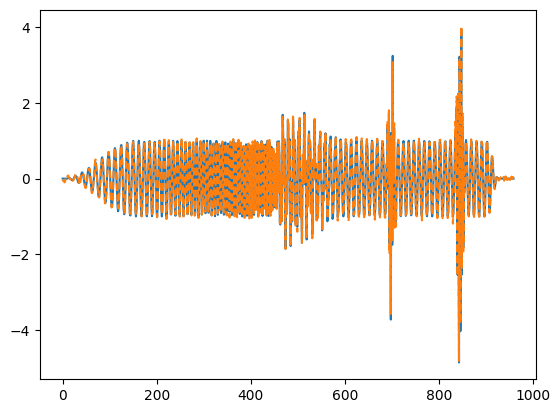

In [8]:

Nfft = 2*N
S, F = get_spectrogram(s)
F = F[0:N+1]
methodml = NewMethod()
funa = methodml.method


# signal_output = funa(signal,[],True,Pnei,M,L)
signal_output = funa(signal,)

S_output, F_output = get_spectrogram(signal_output)
F_output = F_output[0:N+1]

print(10*np.log10((np.sum(s[tmin:tmax]**2))/(np.sum((s[tmin:tmax]-signal_output[tmin:tmax])**2))))

plt.figure()
plt.plot(s[tmin:tmax])
plt.plot(signal_output[tmin:tmax],'--')

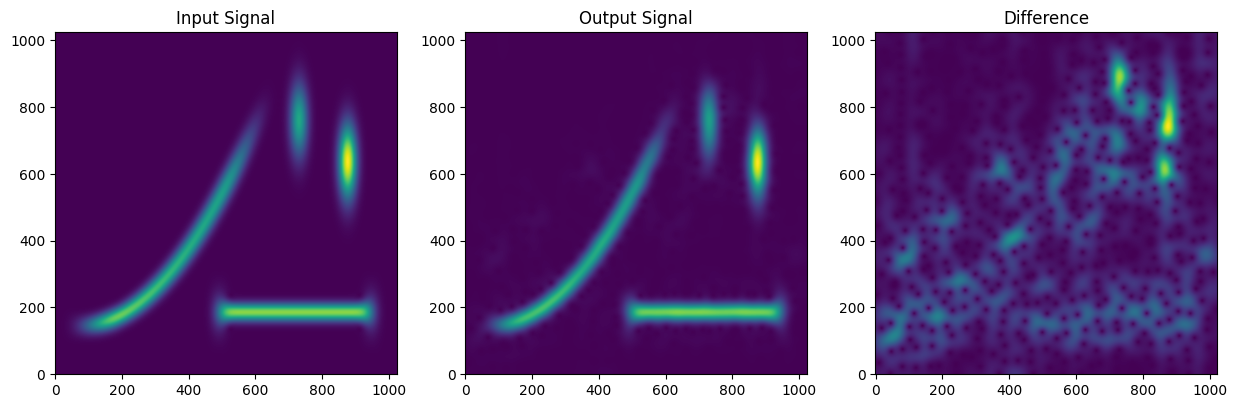

In [9]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[0].set_title('Input Signal')
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].set_title('Output Signal')
ax[2].imshow(abs(F_output-F), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].set_title('Difference')
plt.show()
